In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.ticker

import tensorflow.keras
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.models import  load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Conv2D , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

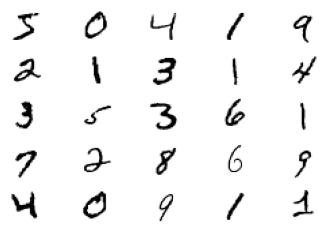

In [4]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
xtrain.shape , xtest.shape

((60000,), (10000,))

In [6]:
# reshape to be [samples][width][height][channels]
xtrain =xtrain.reshape((xtrain.shape[0], 28,28,1))
xtest =xtest.reshape((xtest.shape[0],28,28,1))

In [7]:
# convert to float
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [8]:
# normalizing the data

xtrain /= 255
xtest /= 255

In [9]:
# one-hot encoding

ytrain= utils.to_categorical(ytrain, num_classes=10)
ytest= utils.to_categorical(ytest, num_classes=10)

In [10]:
# building the model

model = Sequential([
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    BatchNormalization(),
    Conv2D(64 , kernel_size= (3,3) , strides=(1,1) , activation ='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    Dropout(0.2),

    Flatten(),
    Dense(500, activation ='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10 , activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [12]:
# compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
# data preparation

data_gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.3, zoom_range=0.08)

test_gen =ImageDataGenerator()

In [14]:
train_generator = data_gen.flow(xtrain, ytrain, batch_size=64)
test_generator = test_gen.flow(xtest, ytest, batch_size=64)

**steps_per_epoch** 
Since the function is intended to loop infinitely, Keras has no ability to determine when one epoch starts and a new epoch begins.
Therefore, we compute the steps_per_epoch value as the total number of training data points divided by the batch size. Once Keras hits this step count it knows that it’s a new epoch.

In [15]:
history = model.fit_generator(train_generator, steps_per_epoch=len(xtrain)// 64, epochs=8 , validation_data=test_generator, validation_steps=10000//64)


Epoch 1/8
937/937 [==============================] - 377s 402ms/step - loss: 0.1777 - acc: 0.9464 - val_loss: 0.0877 - val_acc: 0.9718
Epoch 2/8
937/937 [==============================] - 395s 422ms/step - loss: 0.0818 - acc: 0.9747 - val_loss: 0.0262 - val_acc: 0.9912
Epoch 3/8
937/937 [==============================] - 388s 414ms/step - loss: 0.0620 - acc: 0.9807 - val_loss: 0.0413 - val_acc: 0.9851
Epoch 4/8
937/937 [==============================] - 387s 413ms/step - loss: 0.0557 - acc: 0.9821 - val_loss: 0.0369 - val_acc: 0.9896
Epoch 5/8
937/937 [==============================] - 375s 400ms/step - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0310 - val_acc: 0.9901
Epoch 6/8
937/937 [==============================] - 383s 409ms/step - loss: 0.0468 - acc: 0.9858 - val_loss: 0.0289 - val_acc: 0.9906
Epoch 7/8
937/937 [==============================] - 381s 406ms/step - loss: 0.0423 - acc: 0.9870 - val_loss: 0.0209 - val_acc: 0.9933
Epoch 8/8
937/937 [==============================] - 38

In [16]:
# testing the model
score = model.evaluate(xtest, ytest)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 6s 645us/sample - loss: 0.0234 - acc: 0.9921

Test accuracy:  0.9921


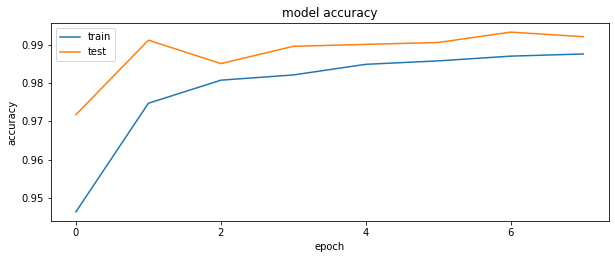

In [17]:
plt.rcParams['figure.figsize'] = (10,8)
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

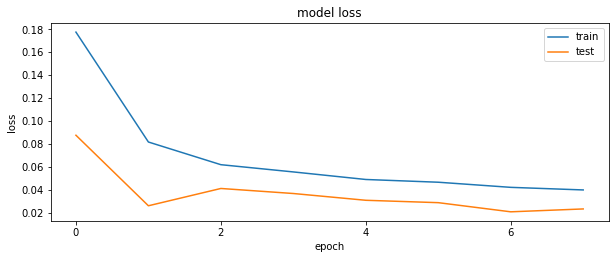

In [18]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

In [19]:
# save the model, so can load it back anytime

#model.save("model.h5")
#print("Saved model to disk")

# load, create and compile model

# network = load_model("model.h5")
#network.summary()